In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

C:\Users\Palke\AppData\Local\Temp\ipykernel_5996\2011421623.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
mobile_df = pd.read_csv("../Data/Mobile Price/train.csv", header=0)

In [3]:
mobile_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### After seeing the data found that we are having 0 null values in the dataframe
### After seeing the data we found that we are having data with all numeric data type

In [4]:
X , y = mobile_df.drop("price_range" , axis=1) , mobile_df["price_range"]

In [5]:
no_outlier_list = ["battery_power","blue","clock_speed","dual_sim","four_g","int_memory","m_dep","mobile_wt","n_cores","pc","px_width","ram","sc_h","sc_w","talk_time","three_g","wifi","touch_screen"]
outlier_list = ["fc","px_height"]

In [6]:
def treat_outlier(df):
    Q3 = np.quantile(df, 0.75)
    Q1 = np.quantile(df, 0.25)
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    df[df>upper_range] = upper_range
    df[df<lower_range] = lower_range
    return df

In [7]:
pd.options.mode.chained_assignment = None
for c_name in outlier_list:
    X[c_name] = treat_outlier(X[c_name])

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [64]:
dt = DecisionTreeClassifier(random_state=10,max_depth=6)
imp_cols = ["ram","px_height","battery_power","int_memory","three_g","touch_screen","mobile_wt","clock_speed"]
X = X[imp_cols]
X_tran = preprocessing.StandardScaler().fit(X).transform(X)
X = pd.DataFrame(X_tran, columns=X.columns.to_list())
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)
model = dt.fit(X_train,y_train)

In [65]:
from sklearn.metrics import accuracy_score
def check_accuracy(model):
    # test_df = pd.read_csv("../Data/Mobile Price/train.csv", header=0)
    # X , y = test_df.drop("price_range" , axis=1) , test_df["price_range"]
    # print(test_df.columns)
    predict = model.predict(X_test)
    print(accuracy_score(y_pred=predict,y_true=y_test))
    

In [66]:
check_accuracy(model)

0.83


In [67]:
mobile_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

<Axes: >

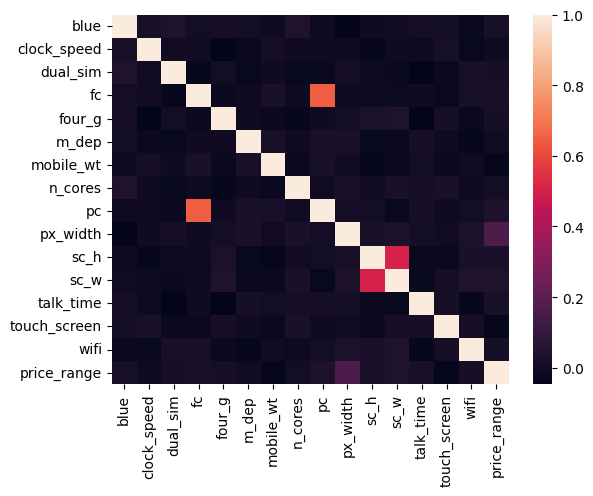

In [68]:
sns.heatmap(mobile_df.drop(["ram","px_height","battery_power","int_memory","three_g"],axis=1).corr())

In [69]:
mobile_df.drop(["ram","px_height","battery_power","int_memory","three_g","touch_screen","mobile_wt","clock_speed"],axis=1).corr()['price_range'].sort_values(ascending=False)

price_range    1.000000
px_width       0.165818
sc_w           0.038711
pc             0.033599
sc_h           0.022986
fc             0.021998
talk_time      0.021859
blue           0.020573
wifi           0.018785
dual_sim       0.017444
four_g         0.014772
n_cores        0.004399
m_dep          0.000853
Name: price_range, dtype: float64